In [1]:
# import the necessary packages
import face_recognition
import argparse
import pickle
import cv2


In [2]:
args = {'encodings': '/home/jugal/Desktop/Face Recognition/encodings_international_celebrity.pickle',
        'image': '/home/jugal/Desktop/Face Recognition/examples/example_.jpg',
        'detection_method': 'hog'}

In [3]:
print("[INFO] loading encodings...")
data = pickle.loads(open(args["encodings"], "rb").read())

[INFO] loading encodings...


In [4]:
image = cv2.imread(args["image"])
#image = cv2.resize(image,(480,720))
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb, model=args["detection_method"])
encodings = face_recognition.face_encodings(rgb, boxes)

[INFO] recognizing faces...


In [6]:
print(boxes)
print(len(encodings[0]))

[(78, 296, 130, 245), (59, 170, 122, 107), (73, 453, 135, 391)]
128


In [7]:
names = []

In [8]:
for encoding in encodings:
    # attempt to match each face in the input image to our known encodings
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"

    # check to see if we have found a match
    if True in matches:
        # find the indexes of all matched faces then initialize a 
        # dictionary to count the total number of times each face was matched
        
        matchedIdxs = [i for (i, b) in enumerate(matches) if b ]
        counts = {}

        # loop over the matched indexes and maintain a count for
        # each recognized face face
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1

        # determine the recognized face with the largest number of
        # votes (note: in the event of an unlikely tie Python will
        # select first entry in the dictionary)
        name = max(counts, key=counts.get)

    # update the list of names
    names.append(name)
print(names)

['Vin Diesel', 'Paul Walker', 'Tyrese Gibson']


In [9]:
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 255), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.6, (255, 255, 255), 2)

# show the output image
#cv2.resize(image,(400,400))
#cv2.imshow("Image", image)  
#cv2.waitKey(0) 

Populating the interactive namespace from numpy and matplotlib


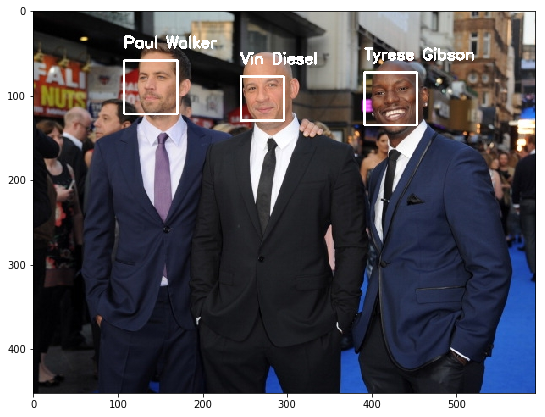

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,16))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(image)
plt.show()